**note**: for anyone trying to view this as a slideshow, run 'pip install rise', reload your notebook, then click on the button that looks like a bar graph to the right of the command palette at the top.

<center><h1>Discussion 9</h1></center>
<center><h2>DSC 20, Fall 2023</h2><center>

<center><h3>Meme of the Week</h3></center>
<br>

<center><img src='imgs/meme.png' width = 500></center>

<center><h3>Agenda</h3></center>

- \_\_str\_\_ and \_\_repr\_\_
- Exceptions
- KNN
- Seeding

<center><h3>Special Methods</h3></center>

- Unique class methods that impose specific functionality
- Denoted by \_\_ prepending and appending method names
- The one you're most familiar with is \_\_init\_\_
- Also called Dunder Methods!

<center><h3>__str__</h3></center>

- human readable representation of a class
- invoked when the string representation of a class is necessary (i.e. in a print or casted to a string)
- does not invoke \_\_repr\_\_

In [25]:
class phone:
    def __init__(self, name, owner, memory):
        self.name = name
        self.owner = owner
        self.memory = memory
    
    def __str__(self):
        return f'{self.name} owned by {self.owner}'

In [26]:
iphone = phone('iPhoneIX', 'nikki',800)
print(f'string representation of phone: {iphone}')
print(f'computational representation of phone: {iphone.__repr__()}')
print('ew!')

string representation of phone: iPhoneIX owned by nikki
computational representation of phone: <__main__.phone object at 0x7f9458ea3a00>
ew!


<center><h3>__repr__</h3></center>

- computer/technical representation of a class
- commonly written so that the returned value can be used to recreate the object
- if no \_\_str\_\_ is implemeneted, \_\_repr\_\_ will be used in lieu

In [27]:
class phone:
    def __init__(self, name, owner, memory):
        self.name = name
        self.owner = owner
        self.memory = memory
    
    def __repr__(self):
        return f'phone("{self.name}", "{self.owner}", {self.memory})'

In [28]:
iphone = phone('iPhoneIX', 'nikki',800)
print(f'string representation of phone: {iphone}')
print(f'computational representation of phone: {iphone.__repr__()}')

string representation of phone: phone("iPhoneIX", "nikki", 800)
computational representation of phone: phone("iPhoneIX", "nikki", 800)


In [29]:
class phone:
    def __init__(self, name, owner, memory):
        self.name = name
        self.owner = owner
        self.memory = memory
    
    def __str__(self):
        return f'{self.name} owned by {self.owner}'
    
    def __repr__(self):
        return f'phone("{self.name}", "{self.owner}", {self.memory})'

In [30]:
iphone = phone('iPhoneIX', 'nikki',800)
print('string representation of phone: ' + str(iphone))
print('computational representation of phone: ' + repr(iphone))

string representation of phone: iPhoneIX owned by nikki
computational representation of phone: phone("iPhoneIX", "nikki", 800)


In [31]:
iphone_copy = eval(iphone.__repr__()) # created a copy using eval on the repr
print('Are they the same object: ' + str(iphone is iphone_copy))
print('Are they the same type: ' + str(type(iphone) == type(iphone_copy)))
print('Same string and repr represention: '+ \
    f'{str(iphone) == str(iphone_copy) and repr(iphone)==repr(iphone_copy)}')

Are they the same object: False
Are they the same type: True
Same string and repr represention: True


In [32]:
iphone_copy2 = eval(iphone.__str__())

SyntaxError: invalid syntax (<string>, line 1)

<center><h3>__(lt, gt, eq, etc.)__</h3></center>

In [ ]:
class phone:
    def __init__(self, name, owner, memory):
        self.name = name
        self.owner = owner
        self.memory = memory
    
    def __repr__(self):
        return f'phone("{self.name}", "{self.owner}", {self.memory})'
    
    def __lt__(self, other_phone):
        return self.memory < other_phone.memory
    
    def __eq__(self, other_phone):
        return self.name == self.name

In [ ]:
iphone = phone('iPhoneIX', 'nikki',800)
samsung = phone('SamsungEarth', 'nikki',1600)
print(f'is the iphone less than the samsung (memory): {iphone<samsung}')
print(f'is the iphone greater than the samsung (memory): {iphone>samsung}')
print(f'are the two phones the same (name): {iphone==samsung}')

<center><h3> Exceptions </h3></center>

- Python class that represents Errors
- Triggered by any event that disrupts normal program flow
- utilizes `raise` keyword

<center><h3> Common Exception Types and Cases </h3></center>

<ul>
    <li> <b style ='color:blue'>KeyError</b> - related to dictionaries; attempted access using a key not present in the object
    <li> <b style ='color:blue'>IndexError</b> - related to lists/strings; attempted acccess of an index that's out of range
    <li> <b style ='color:blue'>TypeError</b> - attempt to unify non - matching data types (ex. str + int) or attempt to access unknown attribute of datatype
    <li> <b style ='color:blue'>FileNotFoundError</b> - related to files; attempted to open a file name that can't be found

<center><h3> raise </h3></center>

<center>python keyword to throw an error.</center>

<center><b>syntax</b>: raise [exception class](error message // optional)</center>

In [33]:
def bar_entry(age):
    if age < 21:
        raise ValueError("too young to drink...")
bar_entry(18)

ValueError: too young to drink...

<center><h3> try except else</h3></center>

- Exceptions can be handled in `try-except` blocks, preventing code from terminating the moment an error happens.
- `Except` generally handles specific error classes (ex. except `zerodivisionerror`)
- just like with files, it's common to specify a handle for easier processing (`as e`)
- `else` is code that's ran in the case of no errors occurring

In [34]:
def attempt_bar_entry(age):
    try:
        bar_entry(age)
    except ValueError as e:
        print(e)
    else:
        print('welcome in!')
        
attempt_bar_entry(18)
print('--------------------------------------')
attempt_bar_entry(21)

too young to drink...
--------------------------------------
welcome in!


<center><h3> try-except vs assert </h3></center>

<center>Assert statements are used to validate inputs and prevent logical errors. Try-except is used to catch error generating inputs / code. </center>

In [35]:
def process_file(filepath):
    # What happens if I pass in an incorrect filepath?
    assert isinstance(filepath, str) # asserts can't catch such errors
    with open(filepath, 'r') as f:
        return f.readlines()
process_file('nope')

FileNotFoundError: [Errno 2] No such file or directory: 'nope'

In [36]:
def process_file(filepath):
    # What happens if I pass in an incorrect filepath?
    try:
        f = open(filepath,'r')
    except FileNotFoundError as e:
        print('oops! filepath is not valid')
    else:
        return f.read()
process_file('nope')
print('--------------------------------------')
process_file('files/sample.txt')

oops! filepath is not valid
--------------------------------------


'Loki season 2 was pretty good'

<center><h3> More Formally, KNN </h3></center>

<center><b style='color:blue'>idea</b>: Given an unseen value of flipper_length and body_mass, how can we determine what species of penguins it belongs to? </center>

<center>The KNN approach is simple - if I look at the k nearest points to this new value, and I take the most common species among them, then this point is <b>most likely</b> the same species as the most common species among the neighbors. 
<img src='https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.complex-narrative-xl-retina.ts=1698405522573.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative/items/content_group/image' style="object-fit:contain;width:80%;">    
</center>

<center><h3>Procedure</h3></center>
<br>

<center><b>Step 1</b>: Given a new point <i>X</i>, quantify the distance between all points and <i>X</i></center>

<center><b>Step 2</b>: Take the <b style = 'color:blue'>k-nearest</b> points to <i>X</i> into consideration</center>

<center><b>Step 3</b>: Classify <i>X</i> as the most common label among the neighbors</center>

<br>

<center><b>note: </b> As the name implies, the key parts of this algorithm are <b style = 'color:blue'>k</b> and <b style = 'color:blue'>nearest</b>. </center> 
    
<center><b style = 'color:blue'>k</b> is often referred to as a <b>hyper-parameter</b>, or a value that you choose independently. There are often procedures to select a good k, but this varies depending on the context. </center>
    
<center><b style = 'color:blue'>Nearest</b> refers to quantifying distance - one such way is to use euclidian distance (distance formula), but there are many other "distances" that can be used (ex. Manhattan Distance).</center>

In [1]:
from sklearn.neighbors import KNeighborsClassifier as KNN
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style = 'darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
# load in penguins data
data = pd.read_csv('data/penguins.csv').dropna()
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
# get columns of interest
mapping = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
reverse_mapping = {v:k for k,v in mapping.items()}
data = data[['species', 'flipper_length_mm', 'body_mass_g']]
data['species'] = data['species'].apply(lambda x: mapping[x])
data.head()

,species,flipper_length_mm,body_mass_g
0,0,181.0,3750.0
1,0,186.0,3800.0
2,0,195.0,3250.0
4,0,193.0,3450.0
5,0,190.0,3650.0


<center><h3> Data Input </h3></center>

- It's convention to call input data X and prediction class Y
- In this example, we are using body mass and flipper length as input (X) and species as prediction (Y)

In [37]:
# define input and prediction
X = data[['body_mass_g', 'flipper_length_mm']]
y = data['species']

<center><h3> fit/predict </h3></center>

- In order for our model to work, we need to mount the data using `fit`
- Once the data is loaded, we can call predict on other inputs using `predict`
- Note that this work differs from your project in that I am preloading a KNN
<center><img src='https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.complex-narrative-xl-retina.ts=1698405522573.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative/items/content_group/image' style="object-fit:contain;width:80%;">    
</center>

In [38]:
clf = KNN(n_neighbors=5)
clf.fit(X,y);

In [39]:
data['pred_y'] = clf.predict(X)

<center><h3> Original Data Plot</h3></center>

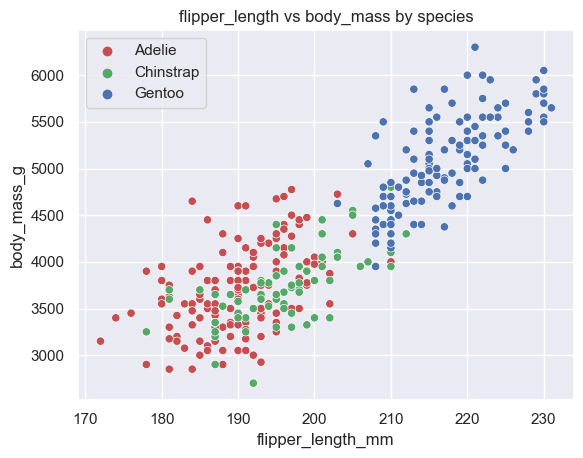

In [8]:
sns.scatterplot(data = data, x = 'flipper_length_mm', y='body_mass_g', hue = 'species', palette=['r','g','b'])
plt.title('flipper_length vs body_mass by species')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels = list(mapping))
plt.show()

<center><h3> Predicted Data Plot</h3></center>

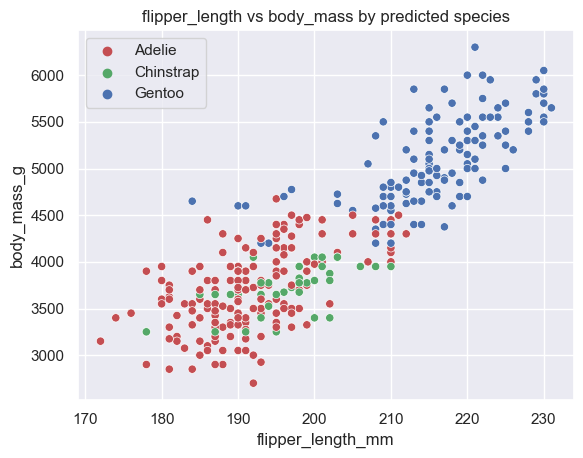

In [9]:
sns.scatterplot(data = data, x = 'flipper_length_mm', y='body_mass_g', hue = 'pred_y', palette=['r','g','b'])
plt.title('flipper_length vs body_mass by predicted species')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels = list(mapping))
plt.show()

<center><h3> Predicting New Points</h3></center>

<center> What species is most likely for a penguin that has a flipper length of 188 mm and a body mass of 3650 grams?</center>

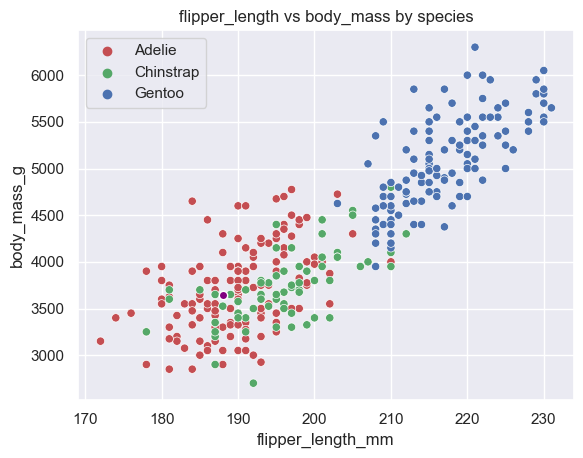

In [10]:
sns.scatterplot(data = data, x = 'flipper_length_mm', y='body_mass_g', hue = 'species', palette=['r','g','b'])
plt.title('flipper_length vs body_mass by species')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles = handles, labels = list(mapping))
plt.scatter(188, 3650, color='purple', edgecolor='white')
plt.show()

<center><h3> Predicting New Points (cont.)</h3></center>

<center>Our resulting prediction changes depending on the number of neighbors we set for our model.</center>

In [11]:
clf = KNN(n_neighbors=2)
clf.fit(X,y);
output = reverse_mapping[clf.predict([[3650, 188]])[0]]

In [12]:
print(f'prediction for 2 neighbors: {output}')

prediction for 2 neighbors: Chinstrap


In [13]:
clf = KNN(n_neighbors=3)
clf.fit(X,y);
output = reverse_mapping[clf.predict([[3650,188]])[0]]

In [14]:
print(f'prediction for 3 neighbors: {output}')

prediction for 3 neighbors: Chinstrap


In [15]:
clf = KNN(n_neighbors=4)
clf.fit(X,y);
output = reverse_mapping[clf.predict([[3650,188]])[0]]

In [16]:
print(f'prediction for 4 neighbors: {output}')

prediction for 4 neighbors: Adelie


In [17]:
clf = KNN(n_neighbors=5)
clf.fit(X,y);
output = reverse_mapping[clf.predict([[3650,188]])[0]]

In [18]:
print(f'prediction for 5 neighbors: {output}')

prediction for 5 neighbors: Chinstrap


<center><h3>Under the Hood</h3></center>

- When predicting new points, we need to:
    - calculate the distance from every point 
    - take the k nearest points into consideration
    - classify according to most common class among neighbors
 

In [19]:
clf = KNN(n_neighbors=4)
clf.fit(X,y)
dists, indices = clf.kneighbors(X = [[3650,188]], n_neighbors=8, return_distance=True)

In [20]:
[(reverse_mapping[list(data.iloc[indices[0]]['species'])[x]], dists[0][x]) for x in range(8)]

[('Chinstrap', 1.0),
 ('Chinstrap', 1.0),
 ('Adelie', 2.0),
 ('Adelie', 3.0),
 ('Chinstrap', 5.0),
 ('Chinstrap', 7.0),
 ('Adelie', 25.96150997149434),
 ('Chinstrap', 26.248809496813376)]

<center><h3>Under the Hood (cont.)</h3></center>

<center>When we used a KNN with k=4 and used it to predict the species of a penguin with 188 body_mass and 3650 flipper_length, it followed the process outlined above and resulted in a tie (2 chinstrap, 2 adelie) among its 4 nearest neighbors, which it then arbitrarily broke and classified this point as an Adelie penguin.</center>

<center> <h3>Seeding</h3></center>

- on homework8, the python package `random` will be utilized
- it will be used to randomly select a value
- in order to test this, the call must be seeded

In [42]:
import random
options = list(range(1,11))
outputs = []
for _ in range(15):
    outputs.append(random.choice(options))
outputs

[1, 9, 4, 2, 7, 8, 2, 7, 3, 9, 6, 10, 9, 3, 1]

<center> <h3>Seeding (cont.)</h3></center>

- `random.choice` selects a random item for a collection
- this is completely random and has no reproducibility
- if you were working with doctests, you would have a 10% chance to be right
- in order to prevent this, we want to `seed` our calls
- `seed`s remove the randomness from a random call, determining a state for the randomness to exist in

In [49]:
outputs_seeded = []
for _ in range(15):
    random.seed(42)
    outputs_seeded.append(random.choice(options))
outputs_seeded

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

<center> Now there's no more randomness! Note that random.seed has to be called before any random call. </center> 

In [51]:
random.seed(12)
print(random.choice(options))
print(random.choice(options))

8
5


In [53]:
random.seed(12)
print(random.choice(options))
random.seed(12)
print(random.choice(options))

8
8


<center> <h1>Thanks for coming!</h1></center>

<center><b>Make sure to complete the participation on Gradescope!</b></center>